# Data Scientist Example Practical Exam Solution - Tasty Bytes

# Problem Description

Head of Data Science: 
> They want us to predict which recipes will be popular 80% of the time and minimize the chance of showing unpopular recipes. I don’t think that is realistic in the time we have, but do your best and present whatever you find.

Product Manager: 
> At the moment, I choose my favorite recipe from a selection and display that on the home
page. We have noticed that traffic to the rest of the website goes up by as much as 40% if I
pick a popular recipe. But I don’t know how to decide if a recipe will be popular. More traffic
means more subscriptions so this is really important to the company.
Can your team:
> - Predict which recipes will lead to high traffic?
> - Correctly predict high traffic recipes 80% of the time?


# Business Goal

The product manager is currently picking recipes to be displayed on the home page based on his own criteria. Displaying on the home page a *high traffic recipe* increases the traffic on the rest of the site as much as 40%. It is crucial to display on the home page high traffic recipes.

The goal of the project is to create a classifier that can predict high traffic AND be able to identify high traffic recipes at least 80% of the time. Since the cost of FP is higher than FN, the metric we will be optimizing is precision, defined as : $ \text{Precision} = \frac{TP}{TP + FP} $

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('recipe_site_traffic_2212.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [3]:
df.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


# Data Information

The product manager has provided data for each recipe, as well as whether there was high traffic when the recipe was featured on the home page.  
However, not all available information about each recipe has been given.  

You can find the data [here].  
Feel free to decide how to process it, but ensure all decisions are documented in your report.  
Additionally, double-check that the data matches the provided descriptions—it might not.  

## Column Definitions

| Column Name   | Details |
|--------------|---------|
| **recipe** | Numeric, unique identifier of the recipe. |
| **calories** | Numeric, number of calories. |
| **carbohydrate** | Numeric, amount of carbohydrates in grams. |
| **sugar** | Numeric, amount of sugar in grams. |
| **protein** | Numeric, amount of protein in grams. |
| **category** | Character, type of recipe. Recipes are classified into one of ten possible groups: <br> `Lunch/Snacks`, `Beverages`, `Potato`, `Vegetable`, `Meat`, `Chicken`, `Pork`, `Dessert`, `Breakfast`, `One Dish Meal`. |
| **servings** | Numeric, number of servings for the recipe. |
| **high_traffic** | Character, indicates whether traffic to the site was high when this recipe was shown. If high, it is marked as `"High"`. |

# Data Validation

## Numeric 
'recipe', 'calories', 'carbohydrate', 'sugar', 'protein'

### Recipe

OK. No duplicates at recipe id level.

In [4]:
df.shape

(947, 8)

In [5]:
df.recipe.nunique()

947

In [6]:
df.recipe.describe()

count    947.000000
mean     474.000000
std      273.519652
min        1.000000
25%      237.500000
50%      474.000000
75%      710.500000
max      947.000000
Name: recipe, dtype: float64

### Calories
52 null values.

In [7]:
df.calories.describe()

count     895.000000
mean      435.939196
std       453.020997
min         0.140000
25%       110.430000
50%       288.550000
75%       597.650000
max      3633.160000
Name: calories, dtype: float64

In [8]:
df.calories.isna().sum()

52

### carbohydrate
52 null values.

In [9]:
df.carbohydrate.describe()

count    895.000000
mean      35.069676
std       43.949032
min        0.030000
25%        8.375000
50%       21.480000
75%       44.965000
max      530.420000
Name: carbohydrate, dtype: float64

In [10]:
df.carbohydrate.isna().sum()

52

### sugar
52 null values.

In [11]:
df.sugar.describe()

count    895.000000
mean       9.046547
std       14.679176
min        0.010000
25%        1.690000
50%        4.550000
75%        9.800000
max      148.750000
Name: sugar, dtype: float64

In [12]:
df.sugar.isna().sum()

52

### protein
52 null values.

In [13]:
df.protein.describe()

count    895.000000
mean      24.149296
std       36.369739
min        0.000000
25%        3.195000
50%       10.800000
75%       30.200000
max      363.360000
Name: protein, dtype: float64

In [14]:
df.protein.isna().sum()

52

## Non-Numeric 
'category', 'servings', 'high_traffic'

In [15]:
def plot_cat(df, col):
    plt.figure(figsize=(10, 5))  
    sns.displot(df, x=col, hue=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count of recipes')
    plt.xticks(rotation=90)
    plt.show()

### Category

Compared to the announced 10 categories, (Lunch/Snacks, Beverages, Potato, Vegetable, Meat, Chicken, Pork, Dessert, Breakfast, One Dish Meal), there is an extra one (Chicken Breast)

<Figure size 1000x500 with 0 Axes>

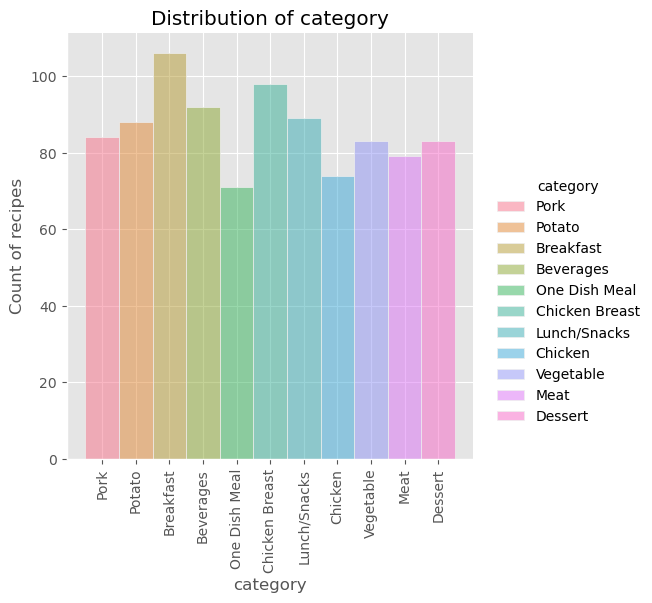

In [16]:
plot_cat(df, 'category')

In [17]:
df['category'].value_counts()

category
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: count, dtype: int64

### Servings

The servings feature was announced as numerical but there are literal values ('4 as a snack', 2 datapoints and '6 as a snack' with 1 datapoint).

<Figure size 1000x500 with 0 Axes>

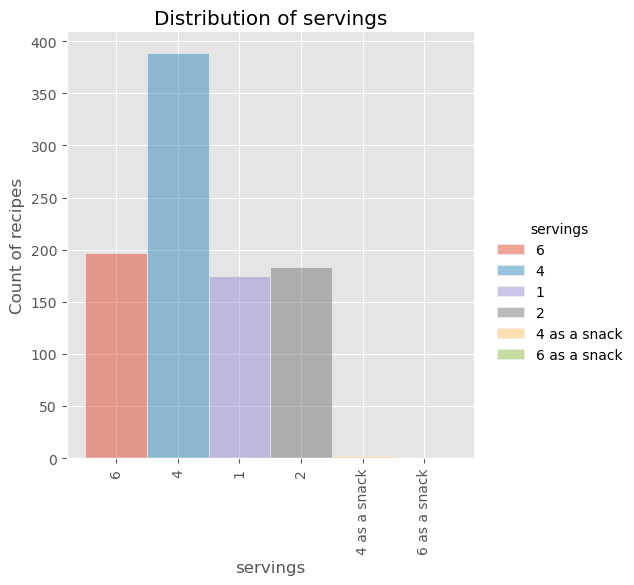

In [18]:
plot_cat(df, 'servings')

In [19]:
df['servings'].value_counts()

servings
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: count, dtype: int64

### High_traffic 

Non high traffic recipes are encoded with null values.

In [20]:
df['high_traffic'].value_counts(dropna=False)

high_traffic
High    574
NaN     373
Name: count, dtype: int64

## Cleaning Data

- [x] **Recipe**: no need to clean.
- [x] **Calories**: input mean based on other category ~and servings~.
- [x] **Carbohydrate**: input mean based on other category ~and servings~.
- [x] **Sugar**: input mean based on other category ~and servings~.
- [x] **Protein**: input mean based on other category ~and servings~.
- [x] **Category**: merge chicken and chicken breast categories. Convert to categorical.
- [x] **Servings**: drop the 'as a snack' datapoints. Convert to categorical.
- [x] **High_traffic**: convert to 1 or 0.

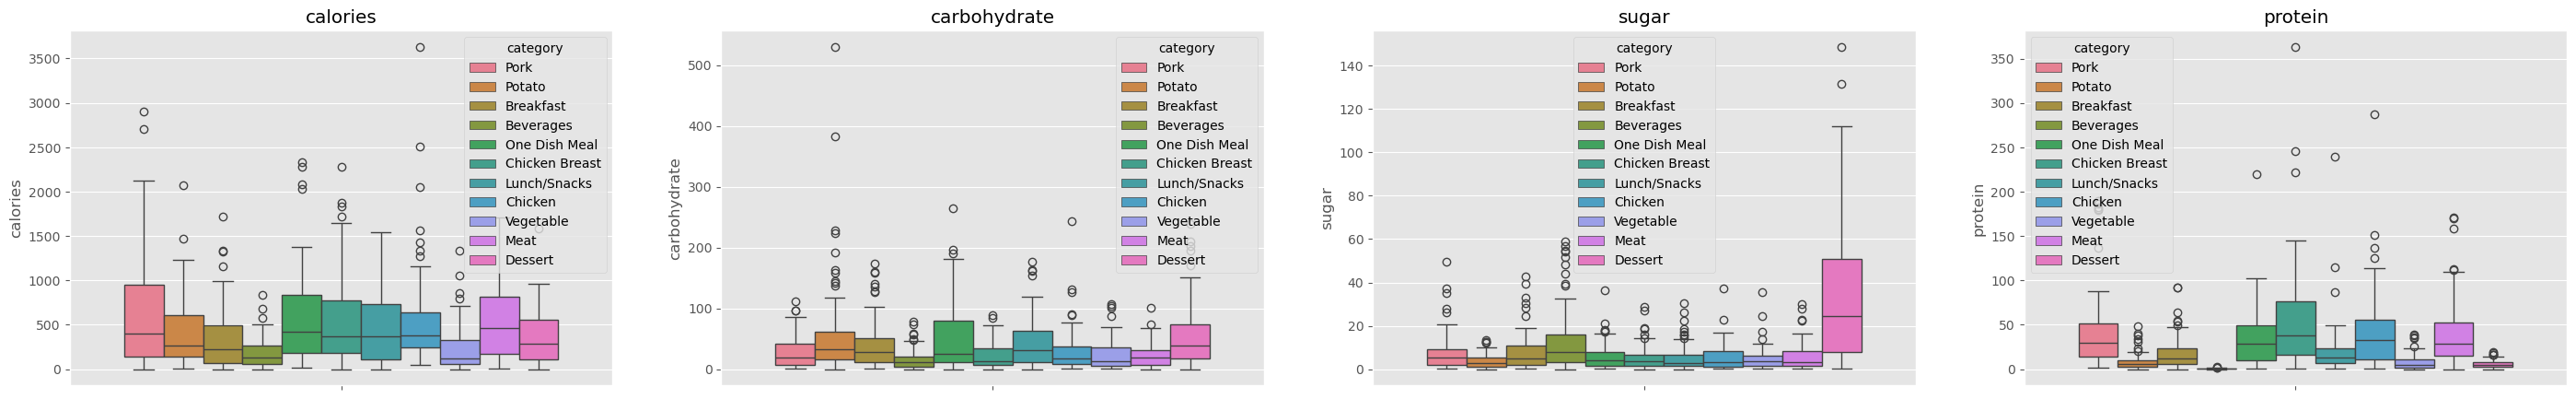

In [21]:
numeric_cols = ['calories', 'carbohydrate', 'sugar', 'protein']

fig, axes = plt.subplots(1, 4, figsize=(35, 5))  # 1 row, 3 columns
for col, ax in zip(numeric_cols, axes):
    sns.boxplot(data=df, hue='category', y=col, ax=ax)
    ax.set_title(col)
plt.show()

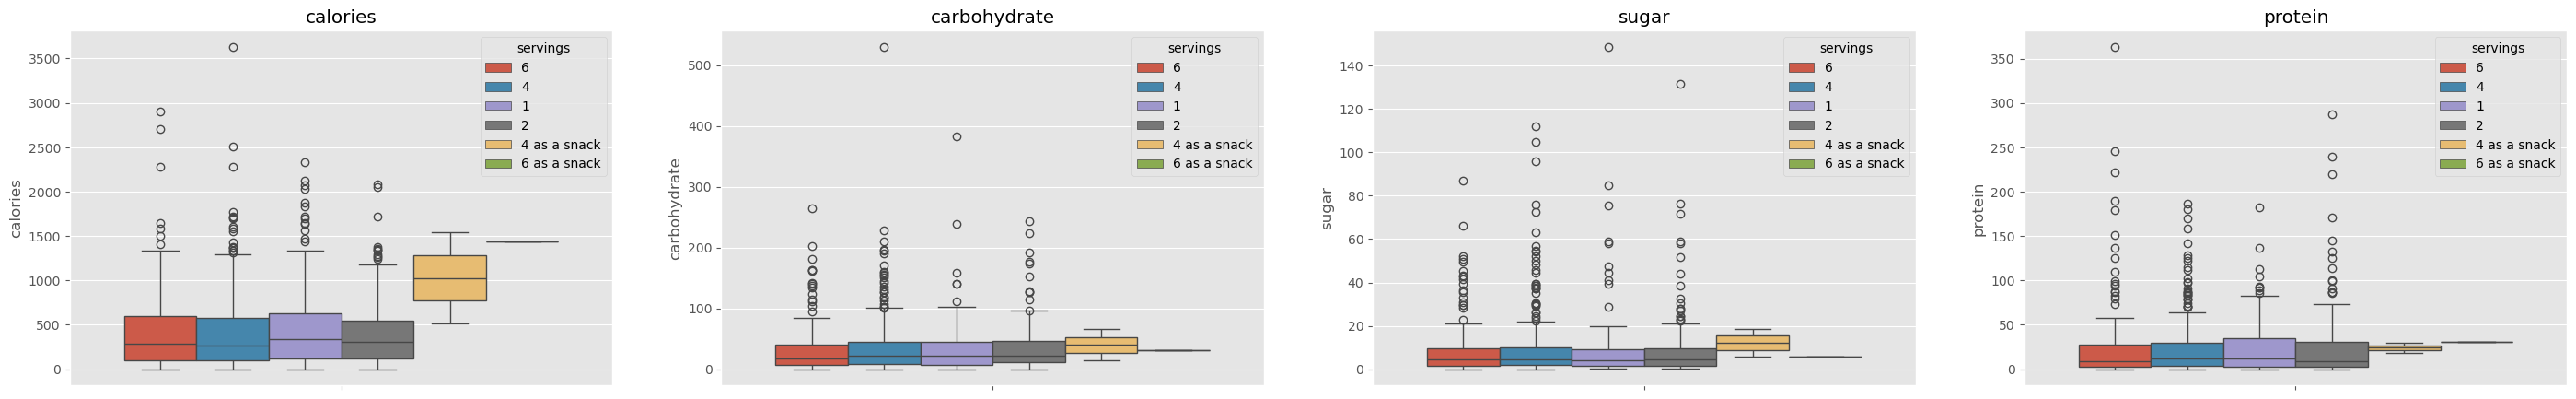

In [22]:
fig, axes = plt.subplots(1, 4, figsize=(35, 5))  # 1 row, 3 columns
for col, ax in zip(numeric_cols, axes):
    sns.boxplot(data=df, hue='servings', y=col, ax=ax)
    ax.set_title(col)
plt.show()

In [23]:
for col in numeric_cols:
    df.loc[:, col] = df.groupby('category')[col].transform(lambda x: x.fillna(x.mean()))

In [24]:
df.loc[:, 'category'] = df['category'].replace('Chicken Breast', 'Chicken')
df['category'] = df['category'].astype('category')

In [25]:
df = df[~df["servings"].str.endswith("as a snack")]

In [26]:
df['servings']=df['servings'].astype('category')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 944 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        944 non-null    int64   
 1   calories      944 non-null    float64 
 2   carbohydrate  944 non-null    float64 
 3   sugar         944 non-null    float64 
 4   protein       944 non-null    float64 
 5   category      944 non-null    category
 6   servings      944 non-null    category
 7   high_traffic  572 non-null    object  
dtypes: category(2), float64(4), int64(1), object(1)
memory usage: 54.0+ KB


In [28]:
df.loc[:, 'high_traffic'] = np.where(df['high_traffic']=='High', 1, 0)
df['high_traffic'] = df['high_traffic'].astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 944 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        944 non-null    int64   
 1   calories      944 non-null    float64 
 2   carbohydrate  944 non-null    float64 
 3   sugar         944 non-null    float64 
 4   protein       944 non-null    float64 
 5   category      944 non-null    category
 6   servings      944 non-null    category
 7   high_traffic  944 non-null    int64   
dtypes: category(2), float64(4), int64(2)
memory usage: 54.0 KB


## Exploratory Analysis 

- Two different types of graphic showing single variables only
- At least one graphic showing two or more variables
- Description of your findings

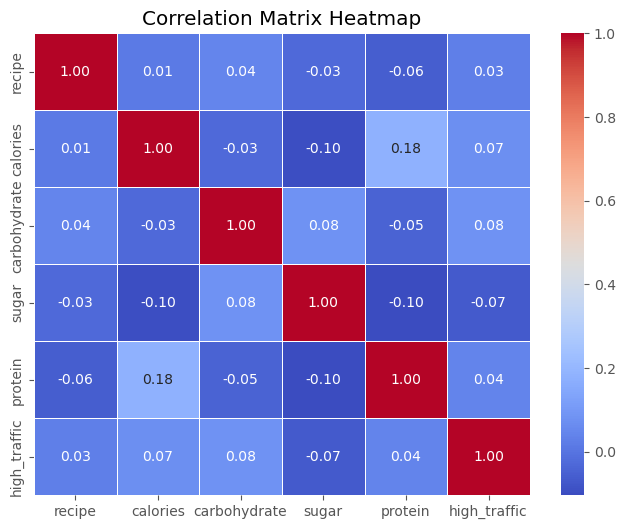

In [30]:
corr_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

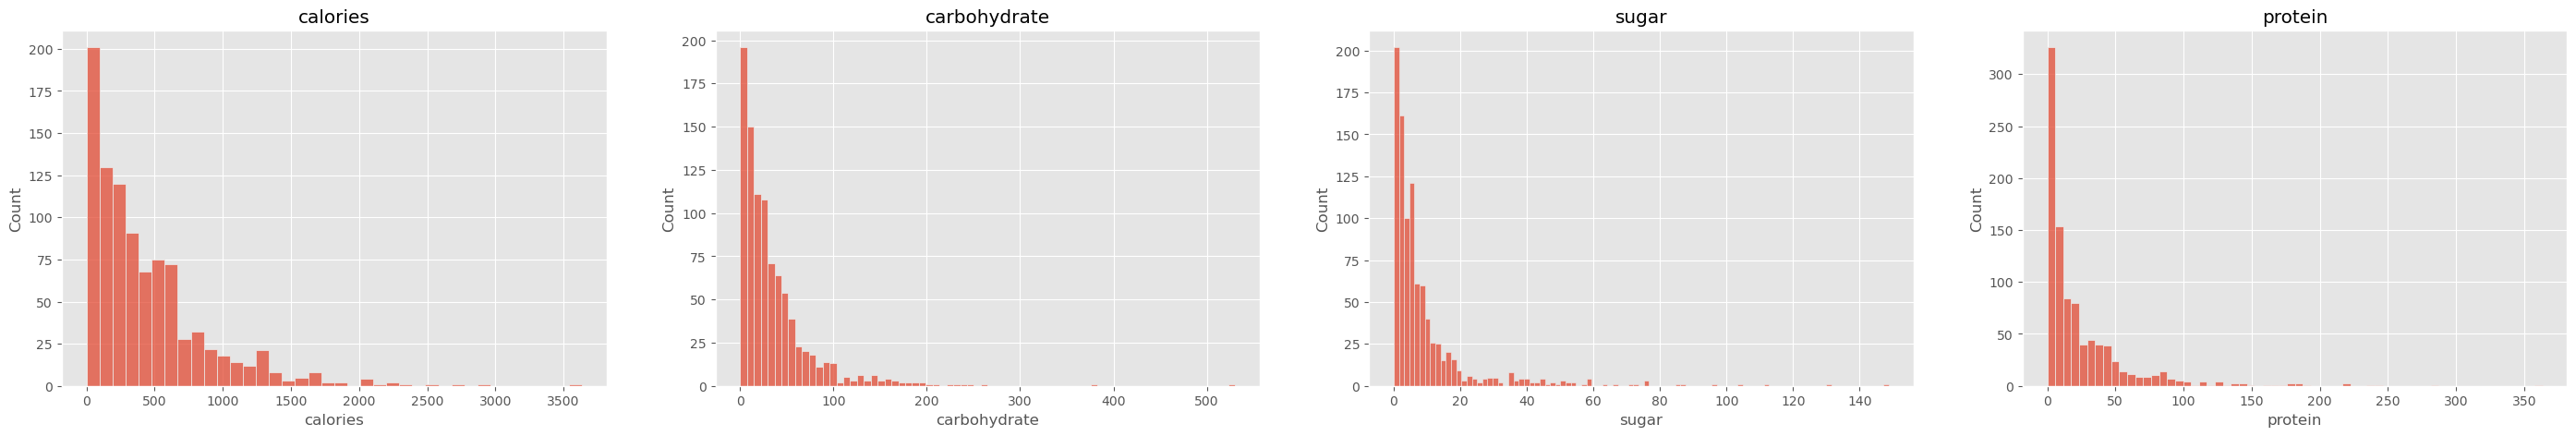

In [31]:
fig, axes = plt.subplots(1, 4, figsize=(35, 5))  # 1 row, 3 columns
for col, ax in zip(numeric_cols, axes):
    sns.histplot(data=df, x=col, ax=ax)
    ax.set_title(col)
plt.show()

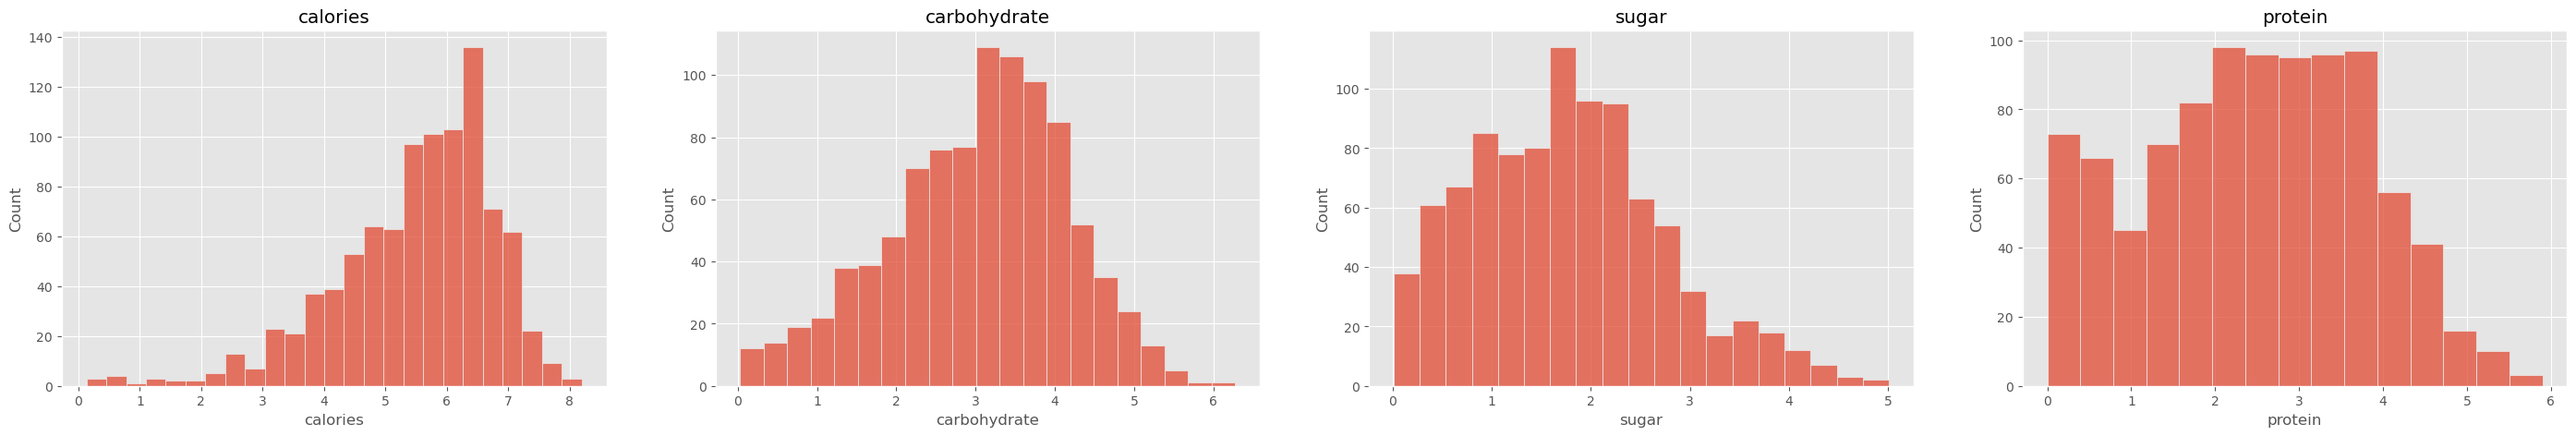

In [32]:
fig, axes = plt.subplots(1, 4, figsize=(35, 5))  # 1 row, 3 columns
for col, ax in zip(numeric_cols, axes):
    sns.histplot(np.log1p(df[col]), ax=ax)
    ax.set_title(col)
plt.show()

In [41]:
log_numeric_cols = [] 
for col in numeric_cols:
    log_col = 'log_' + col
    df[log_col] = np.log1p(df[col])
    log_numeric_cols.append(log_col)

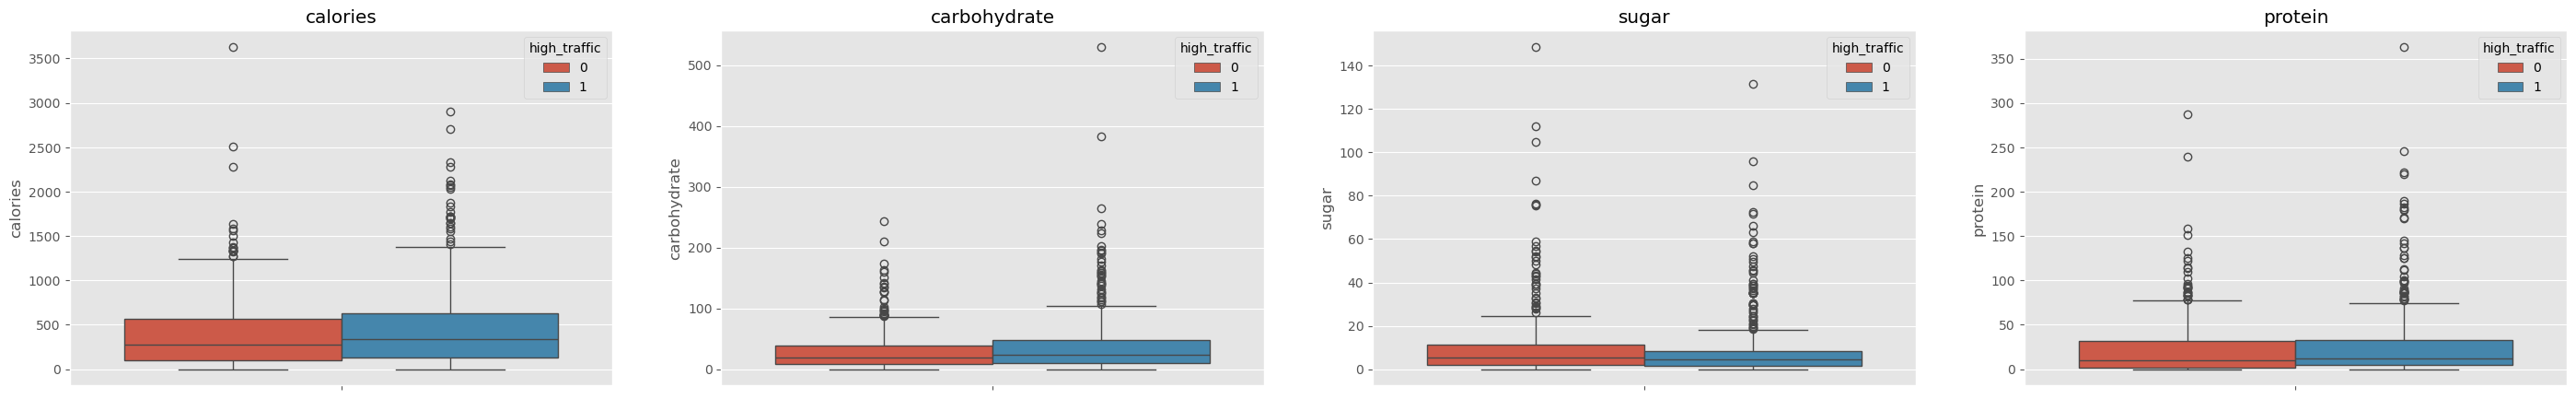

In [42]:
fig, axes = plt.subplots(1, 4, figsize=(35, 5))  # 1 row, 3 columns
for col, ax in zip(numeric_cols, axes):
    sns.boxplot(data=df, hue='high_traffic', y=col, ax=ax)
    ax.set_title(col)
plt.show()

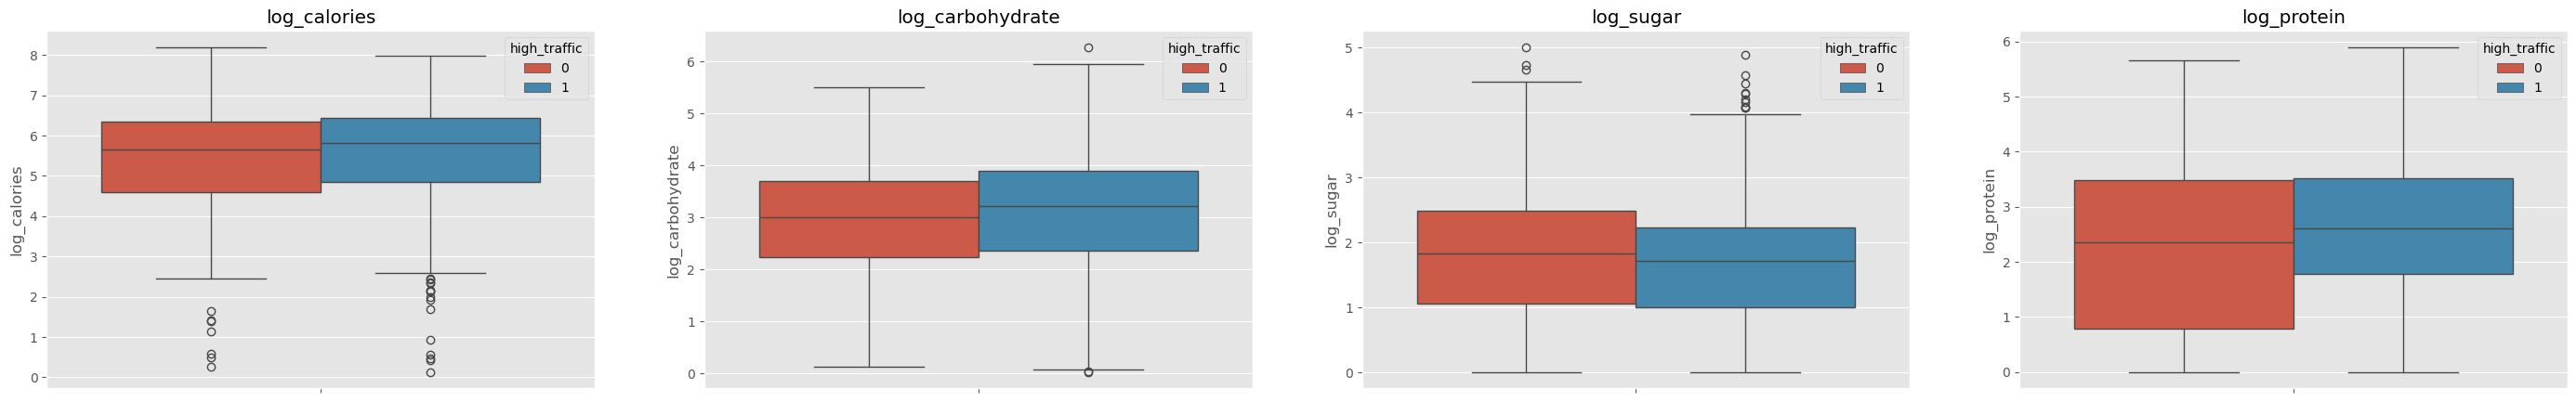

In [43]:
fig, axes = plt.subplots(1, 4, figsize=(35, 5))  # 1 row, 3 columns
for col, ax in zip(log_numeric_cols, axes):
    sns.boxplot(data=df, hue='high_traffic', y=col, ax=ax)
    ax.set_title(col)
plt.show()

In [44]:
df = df.drop(numeric_cols, axis=1)

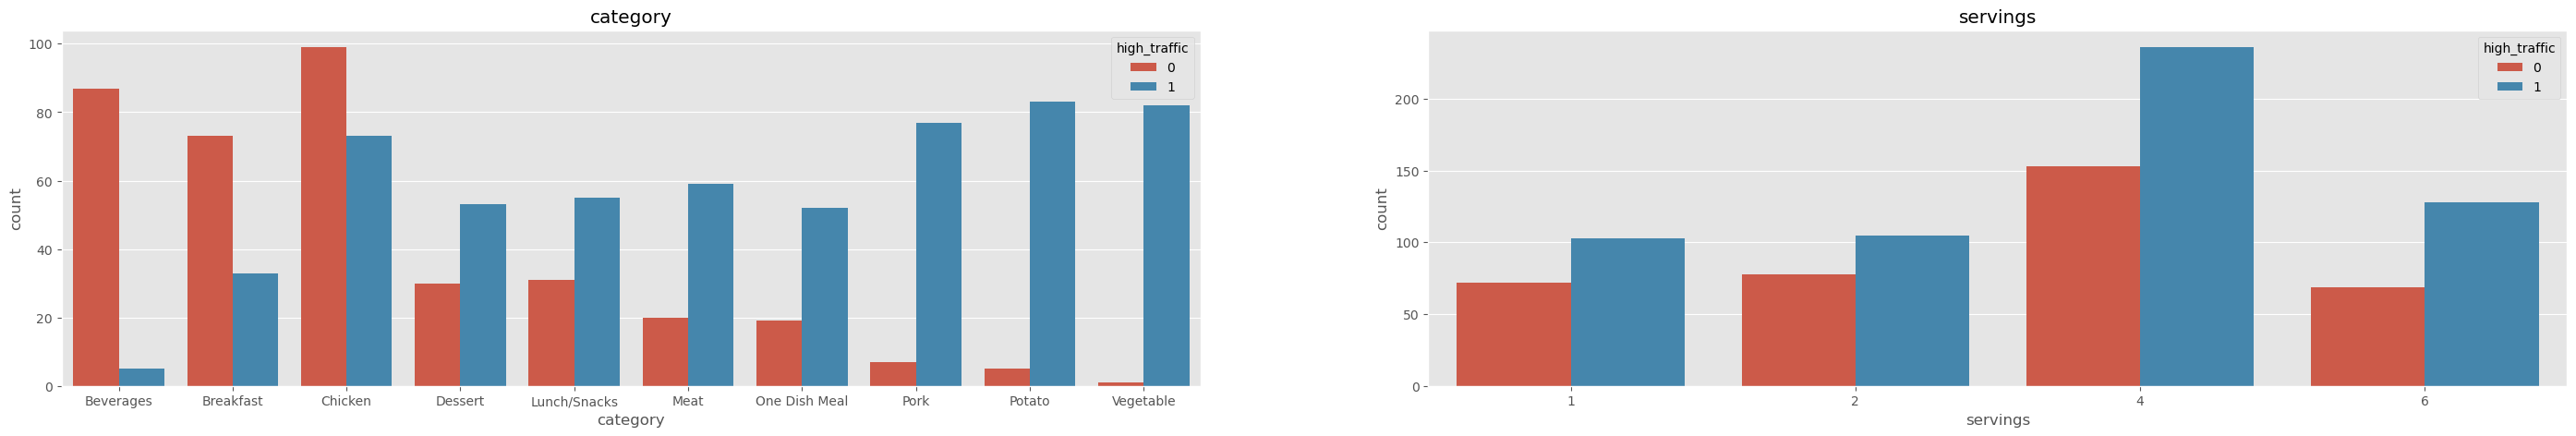

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(35, 5))  # 1 row, 3 columns
for col, ax in zip(['category', 'servings'], axes):
    sns.countplot(data=df, hue='high_traffic', x=col, ax=ax, dodge=True)
    ax.set_title(col)
plt.show()

# Model Development 

Since this is a classification problem lets train a couple of models and see how their precision is (precision is the metric we are trying to optimize since we want to avoid false positives)


In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score

# Assuming 'df' is the dataframe you're working with
# Apply pd.get_dummies to 'category' and 'servings'
df_dummies = pd.get_dummies(df, columns=['category', 'servings'], drop_first=True)

# Define features and target
X = df_dummies.drop('high_traffic', axis=1)
y = df_dummies['high_traffic']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the decision tree model
dt = DecisionTreeClassifier(random_state=42)

# Set up the parameter grid for GridSearchCV to avoid overfitting
param_grid = {
    'max_depth': [2, 5, 7, 10, 12],  # Restrict max depth to reduce complexity
    'min_samples_leaf': [1, 2, 4],  # Increase leaf size to avoid overfitting on small data
    'min_samples_split': [2, 3, 5],  # Increase min samples for splitting
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'min_impurity_decrease': [0, 0.01, 0.03]  # Add impurity decrease for regularization
}

# Apply GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Print the best parameters found
print(f"Best Parameters: {grid_search.best_params_}")

# Predict on train and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate accuracy and precision
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Test Precision: {test_precision:.4f}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 4, 'min_samples_split': 2}
Train Accuracy: 0.7430
Test Accuracy: 0.7460
Train Precision: 0.7929
Test Precision: 0.8131


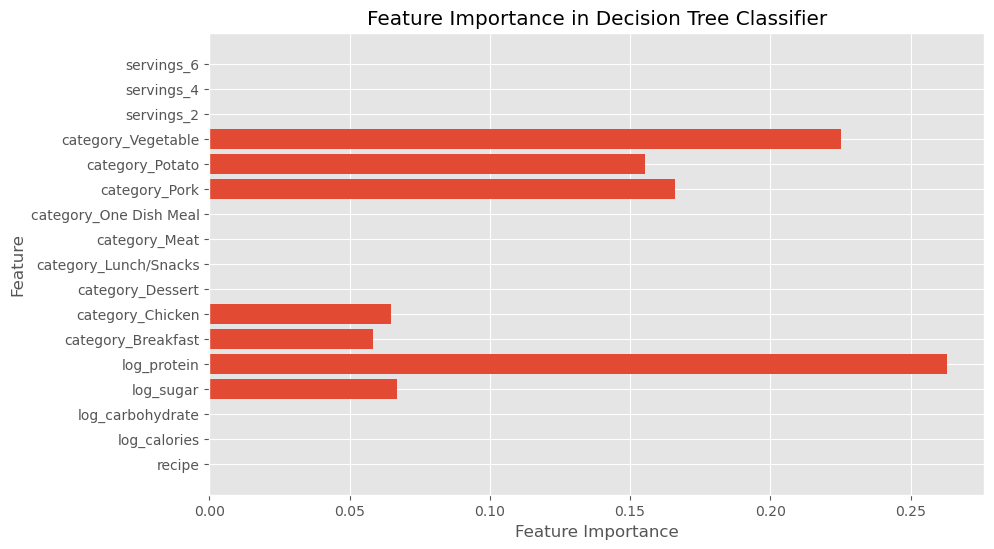

In [47]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, best_model.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Classifier')
plt.show()

/opt/anaconda3/envs/BaseML/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_impurity_decrease': 0, 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 50}
Cross-Validation Accuracy for the Best Model: 0.7430
Cross-Validation Precision for the Best Model: 0.7657

Train Accuracy: 0.9073
Test Accuracy: 0.7354
Train Precision: 0.8990
Test Precision: 0.7778


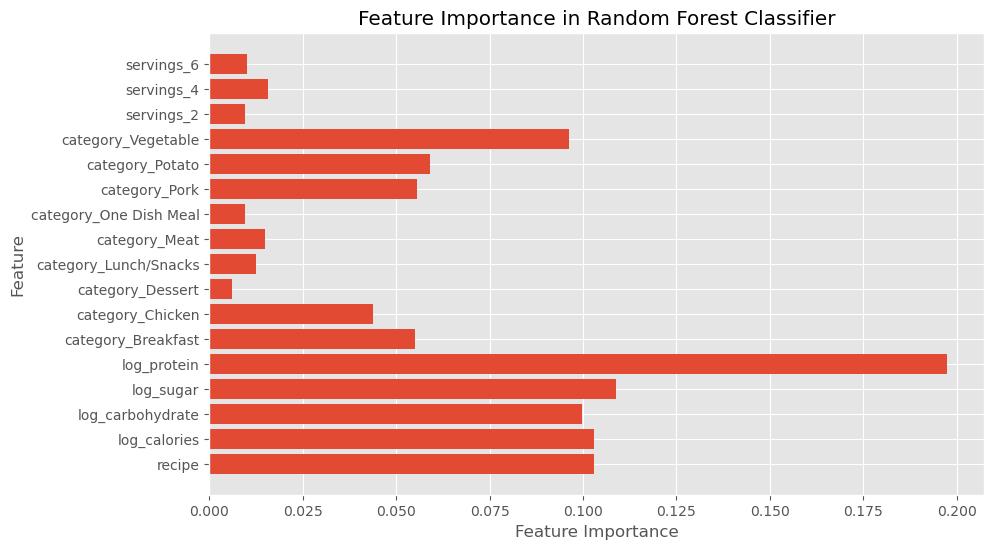

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

# Assuming 'df' is the dataframe you're working with
# Apply pd.get_dummies to 'category' and 'servings'
df_dummies = pd.get_dummies(df, columns=['category', 'servings'], drop_first=True)

# Define features and target
X = df_dummies.drop('high_traffic', axis=1)
y = df_dummies['high_traffic']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the random forest model
rf = RandomForestClassifier(random_state=42)

# Set up the parameter grid for GridSearchCV to avoid overfitting
param_grid = {
    'n_estimators': [47, 50, 52],  # Number of trees in the forest
    'max_depth': [18, 20, 21],  # Restrict max depth to reduce complexity
    'min_samples_leaf': [2, 3, 4],  # Increase leaf size
    'min_samples_split': [11, 12, 13],  # Increase min samples for splitting
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'min_impurity_decrease': [0]  # Regularization via impurity decrease
}

# Apply GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Print the best parameters found
print(f"Best Parameters: {grid_search.best_params_}")

# Cross-validation accuracy for the best model
cv_accuracy = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy').mean()
print(f"Cross-Validation Accuracy for the Best Model: {cv_accuracy:.4f}")

# Cross-validation precision for the best model
y_train_cv_pred = cross_val_predict(best_model, X_train, y_train, cv=5)
cv_precision = precision_score(y_train, y_train_cv_pred)
print(f"Cross-Validation Precision for the Best Model: {cv_precision:.4f}")

# Predict on train and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate accuracy and precision for train and test
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

# Print the results
print(f"\nTrain Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Test Precision: {test_precision:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, best_model.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

# Assuming 'df' is the dataframe you're working with
# Apply pd.get_dummies to 'category' and 'servings'
df_dummies = pd.get_dummies(df, columns=['category', 'servings'], drop_first=True)

# Define features and target
X = df_dummies.drop('high_traffic', axis=1)
y = df_dummies['high_traffic']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Set up the parameter grid for GridSearchCV to avoid overfitting
param_grid = {
    'C': [3, 4, 5, 6, 7],  # Regularization strength
    'solver': ['liblinear'],  # Solvers to choose from
    'penalty': ['l2'],  # Regularization methods
    'max_iter': [23, 24, 25, 26, 27],  # Number of iterations for optimization
}
{'C': 10, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}

# Apply GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Print the best parameters found
print(f"Best Parameters: {grid_search.best_params_}")

# Cross-validation accuracy for the best model
cv_accuracy = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy').mean()
print(f"Cross-Validation Accuracy for the Best Model: {cv_accuracy:.4f}")

# Cross-validation precision for the best model
y_train_cv_pred = cross_val_predict(best_model, X_train, y_train, cv=5)
cv_precision = precision_score(y_train, y_train_cv_pred)
print(f"Cross-Validation Precision for the Best Model: {cv_precision:.4f}")

# Predict on train and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate accuracy and precision for train and test
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

# Print the results
print(f"\nTrain Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Test Precision: {test_precision:.4f}")

Best Parameters: {'C': 3, 'max_iter': 23, 'penalty': 'l2', 'solver': 'liblinear'}
Cross-Validation Accuracy for the Best Model: 0.7510
Cross-Validation Precision for the Best Model: 0.7856

Train Accuracy: 0.7642
Test Accuracy: 0.7831
Train Precision: 0.7937
Test Precision: 0.8246


/opt/anaconda3/envs/BaseML/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/BaseML/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/BaseML/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/BaseML/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/BaseML/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/BaseML/lib/python3.11/site-packages/sklearn/svm/_base.p